<a href="https://colab.research.google.com/github/spi727/Linear-Regression/blob/main/health_care.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-03-04 06:36:44--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0s      

2024-03-04 06:36:45 (149 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


Data Preprocessing

In [ ]:
dataset=pd.concat([dataset,pd.get_dummies(dataset['sex'],prefix="sex")],axis=1)
dataset=pd.concat([dataset,pd.get_dummies(dataset['smoker'],prefix="smoker")],axis=1)
dataset=pd.concat([dataset,pd.get_dummies(dataset['region'],prefix="region")],axis=1)
dataset

,age,sex,bmi,children,smoker,region,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.9,0,yes,southwest,16884.92,1,0,0,1,0,0,0,1
1,18,male,33.8,1,no,southeast,1725.55,0,1,1,0,0,0,1,0
2,28,male,33.0,3,no,southeast,4449.46,0,1,1,0,0,0,1,0
3,33,male,22.7,0,no,northwest,21984.47,0,1,1,0,0,1,0,0
4,32,male,28.9,0,no,northwest,3866.86,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,0,1,1,0,0,1,0,0
1334,18,female,31.9,0,no,northeast,2205.98,1,0,1,0,1,0,0,0
1335,18,female,36.9,0,no,southeast,1629.83,1,0,1,0,0,0,1,0
1336,21,female,25.8,0,no,southwest,2007.95,1,0,1,0,0,0,0,1


In [ ]:
dataset.drop(['sex','smoker','region'],axis=1,inplace=True)

In [ ]:
xcol=dataset.columns.drop('expenses')
x=dataset[xcol].values
y=dataset['expenses'].values

Splitting dataset

In [ ]:
train_dataset, test_dataset, train_labels, test_labels = train_test_split(x, y, train_size=0.8)

Neural Model

In [ ]:
model=Sequential()
model.add(Dense(64,input_dim=x.shape[1],activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',metrics=['mean_absolute_error','mean_squared_error'],optimizer='Adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(train_dataset,train_labels,validation_data=(test_dataset,test_labels),verbose=2,epochs=1000)

Epoch 1/1000
34/34 - 1s - loss: 13194.0908 - mean_absolute_error: 13194.0908 - mean_squared_error: 321979520.0000 - val_loss: 13465.0635 - val_mean_absolute_error: 13465.0635 - val_mean_squared_error: 322211136.0000 - 1s/epoch - 34ms/step
Epoch 2/1000
34/34 - 0s - loss: 13144.1797 - mean_absolute_error: 13144.1797 - mean_squared_error: 320546816.0000 - val_loss: 13392.2744 - val_mean_absolute_error: 13392.2744 - val_mean_squared_error: 320147040.0000 - 142ms/epoch - 4ms/step
Epoch 3/1000
34/34 - 0s - loss: 13030.6865 - mean_absolute_error: 13030.6865 - mean_squared_error: 317346464.0000 - val_loss: 13224.8193 - val_mean_absolute_error: 13224.8193 - val_mean_squared_error: 315447520.0000 - 123ms/epoch - 4ms/step
Epoch 4/1000
34/34 - 0s - loss: 12789.7783 - mean_absolute_error: 12789.7783 - mean_squared_error: 310746080.0000 - val_loss: 12895.9170 - val_mean_absolute_error: 12895.9170 - val_mean_squared_error: 306379968.0000 - 132ms/epoch - 4ms/step
Epoch 5/1000
34/34 - 0s - loss: 12351.

9/9 - 0s - loss: 1941.6163 - mean_absolute_error: 1941.6163 - mean_squared_error: 22275136.0000 - 44ms/epoch - 5ms/step
Testing set Mean Abs Error: 1941.62 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


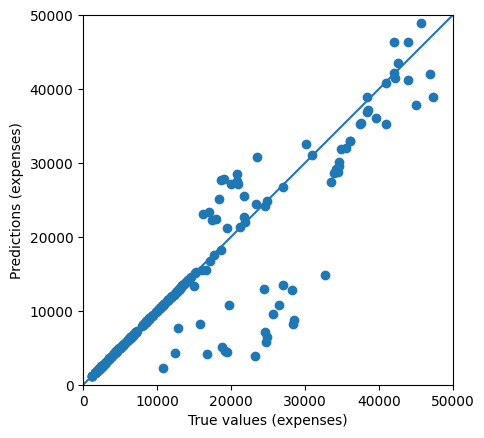

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
